In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trairi
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 6 of Set 1 | hede
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | kandrian
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | cabedelo
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | pavilosta
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | gasa
Processing Record 19 of Set 1 | vari
Processing Record 20 of Set 1 | plettenberg bay
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | iquitos
Pro

Processing Record 36 of Set 4 | jiuquan
Processing Record 37 of Set 4 | vlad tepes
Processing Record 38 of Set 4 | bowen
Processing Record 39 of Set 4 | kashi
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | tessalit
Processing Record 43 of Set 4 | sambava
Processing Record 44 of Set 4 | tongliao
Processing Record 45 of Set 4 | zhangye
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | sembakung
Processing Record 49 of Set 4 | gold coast
Processing Record 50 of Set 4 | dothan
Processing Record 1 of Set 5 | diego de almagro
Processing Record 2 of Set 5 | gardan diwal
City not found. Skipping...
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 5 | port shepstone
Processing Record 7 of Set 5 | tshane
Processing Record

City not found. Skipping...
Processing Record 27 of Set 8 | baghdad
Processing Record 28 of Set 8 | balkanabat
Processing Record 29 of Set 8 | vao
Processing Record 30 of Set 8 | salisbury
Processing Record 31 of Set 8 | novikovo
Processing Record 32 of Set 8 | buraydah
Processing Record 33 of Set 8 | martil
Processing Record 34 of Set 8 | cozumel
Processing Record 35 of Set 8 | batemans bay
Processing Record 36 of Set 8 | vanimo
Processing Record 37 of Set 8 | sorland
Processing Record 38 of Set 8 | straseni
Processing Record 39 of Set 8 | marsh harbour
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 42 of Set 8 | tromso
Processing Record 43 of Set 8 | puerto escondido
Processing Record 44 of Set 8 | aflu
City not found. Skipping...
Processing Record 45 of Set 8 | agadez
Processing Record 46 of Set 8 | mahibadhoo
Processing Record 47 of Set 8 | mackenzie
Processing Record 48 of Set 8 | azare
Processing R

City not found. Skipping...
Processing Record 18 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 19 of Set 12 | chara
Processing Record 20 of Set 12 | roald
Processing Record 21 of Set 12 | itacoatiara
Processing Record 22 of Set 12 | porto san giorgio
Processing Record 23 of Set 12 | surt
Processing Record 24 of Set 12 | santa rosa
Processing Record 25 of Set 12 | kerteh
City not found. Skipping...
Processing Record 26 of Set 12 | rungata
City not found. Skipping...
Processing Record 27 of Set 12 | machilipatnam
Processing Record 28 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 29 of Set 12 | bajil
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | kendallville
Processing Record 32 of Set 12 | mandera
Processing Record 33 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 34 of Set 12 | hay river
Processing Record 35 of Set 12 | keetmanshoop
Processing Record 36 of Set 12 | yulara
Processing Record 37 

In [7]:
len(city_data)

568

In [8]:
# Convert the array of dictionaries into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Trairi,-3.2778,-39.2689,86.07,62,94,12.19,BR,2021-01-29 15:36:14
1,Guerrero Negro,27.9769,-114.0611,59.23,68,2,4.59,MX,2021-01-29 15:36:14
2,Kapaa,22.0752,-159.3190,73.40,73,75,17.27,US,2021-01-29 15:36:14
3,Hithadhoo,-0.6000,73.0833,82.47,75,41,9.24,MV,2021-01-29 15:36:15
4,Hede,33.7681,120.2517,34.84,80,58,9.57,CN,2021-01-29 15:36:15
5,Saint-Philippe,-21.3585,55.7679,84.20,61,20,2.30,RE,2021-01-29 15:36:15
6,Arraial Do Cabo,-22.9661,-42.0278,93.20,51,0,17.27,BR,2021-01-29 15:36:15
7,Vaini,-21.2000,-175.2000,75.20,88,75,9.22,TO,2021-01-29 15:36:16
8,Kandrian,-6.2167,149.5500,80.76,81,99,12.64,PG,2021-01-29 15:36:16
9,Ushuaia,-54.8000,-68.3000,41.00,75,75,28.77,AR,2021-01-29 15:31:34


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trairi,BR,2021-01-29 15:36:14,-3.2778,-39.2689,86.07,62,94,12.19
1,Guerrero Negro,MX,2021-01-29 15:36:14,27.9769,-114.0611,59.23,68,2,4.59
2,Kapaa,US,2021-01-29 15:36:14,22.0752,-159.3190,73.40,73,75,17.27
3,Hithadhoo,MV,2021-01-29 15:36:15,-0.6000,73.0833,82.47,75,41,9.24
4,Hede,CN,2021-01-29 15:36:15,33.7681,120.2517,34.84,80,58,9.57
5,Saint-Philippe,RE,2021-01-29 15:36:15,-21.3585,55.7679,84.20,61,20,2.30
6,Arraial Do Cabo,BR,2021-01-29 15:36:15,-22.9661,-42.0278,93.20,51,0,17.27
7,Vaini,TO,2021-01-29 15:36:16,-21.2000,-175.2000,75.20,88,75,9.22
8,Kandrian,PG,2021-01-29 15:36:16,-6.2167,149.5500,80.76,81,99,12.64
9,Ushuaia,AR,2021-01-29 15:31:34,-54.8000,-68.3000,41.00,75,75,28.77


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

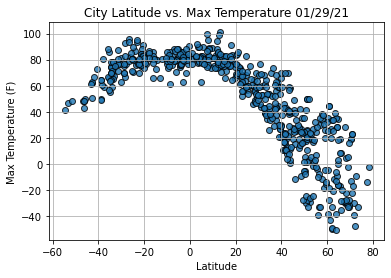

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

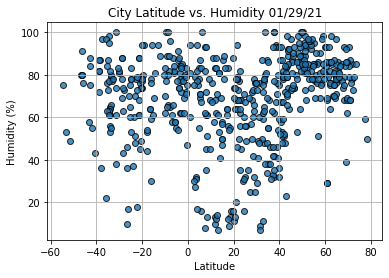

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

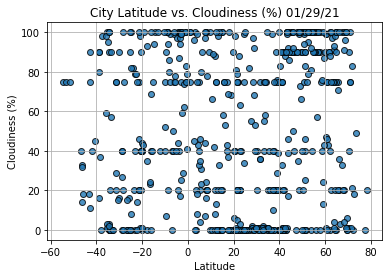

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

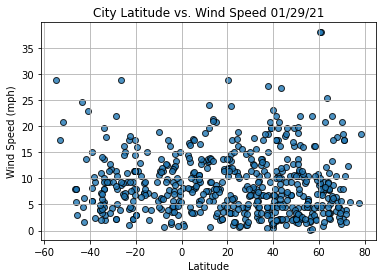

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()